# MAKE YOUR OWN NEURAL NETWORK
**FRANK FAYIA KENDEMAH(玛拿西)**

**Quiz No. 6**

Please complete the code from page 169 to page 173.

In [8]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notbook, not an external window
%matplotlib inline
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [2]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs    

In [7]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open(r"C:/Users/fajos/Desktop/Neural Network/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open(r"C:/Users/fajos/Desktop/Neural Network/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("Performance = ", scorecard_array.sum() / scorecard_array.size)

Performance =  0.9732


In [12]:
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob("C:/Users/fajos/Desktop/Neural Network/my_own_images/2828_my_own_?.png"):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print("Loading ..... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data to test data set
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)
    
    pass


Loading .....  C:/Users/fajos/Desktop/Neural Network/my_own_images\2828_my_own_2.png
0.01
1.0
Loading .....  C:/Users/fajos/Desktop/Neural Network/my_own_images\2828_my_own_3.png
0.01
1.0
Loading .....  C:/Users/fajos/Desktop/Neural Network/my_own_images\2828_my_own_4.png
0.01
0.93011767
Loading .....  C:/Users/fajos/Desktop/Neural Network/my_own_images\2828_my_own_5.png
0.01
0.86800003
Loading .....  C:/Users/fajos/Desktop/Neural Network/my_own_images\2828_my_own_6.png
0.01
1.0


[[6.76936263e-04]
 [2.75817867e-03]
 [3.77715000e-02]
 [2.60513513e-03]
 [8.33349660e-01]
 [4.06951540e-02]
 [2.20036343e-02]
 [3.01753876e-03]
 [6.21225071e-04]
 [1.01123435e-02]]
Network says  4
Match!


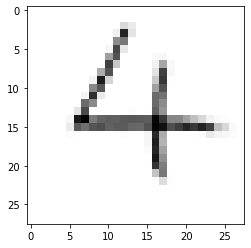

In [13]:
# test the neural network with our own images

# record to test
item = 2

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28, 28), cmap='Greys', interpolation="None")

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print(outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("Network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print("Match!")
else:
    print("No match!")
    pass